In [399]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

In [400]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [401]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [402]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [403]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Number of unique keywords within training set: 222
Number of unique keywords within testing set: 222


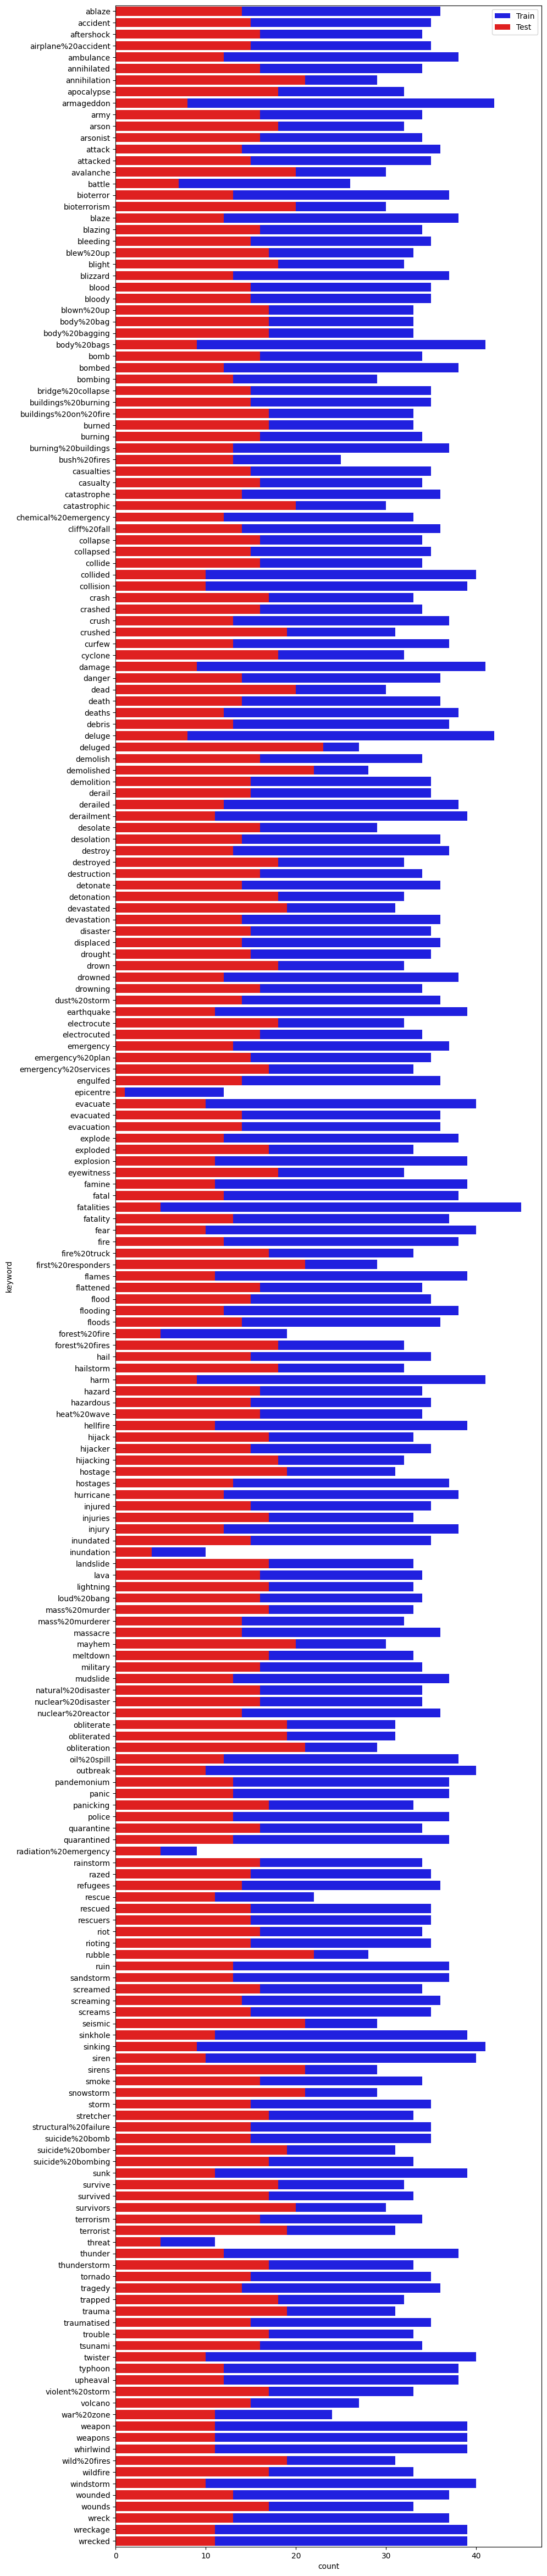

In [404]:
plt.figure(figsize=(10,60))
print(f'Number of unique keywords within training set: {len(df_train.keyword.unique())}')
print(f'Number of unique keywords within testing set: {len(df_test.keyword.unique())}')
sns.countplot(y=df_train['keyword'], color=(0,0,1), label='Train')
sns.countplot(y=df_test['keyword'], color=(1,0,0), label='Test')
plt.legend()

<Axes: xlabel='count', ylabel='keyword'>

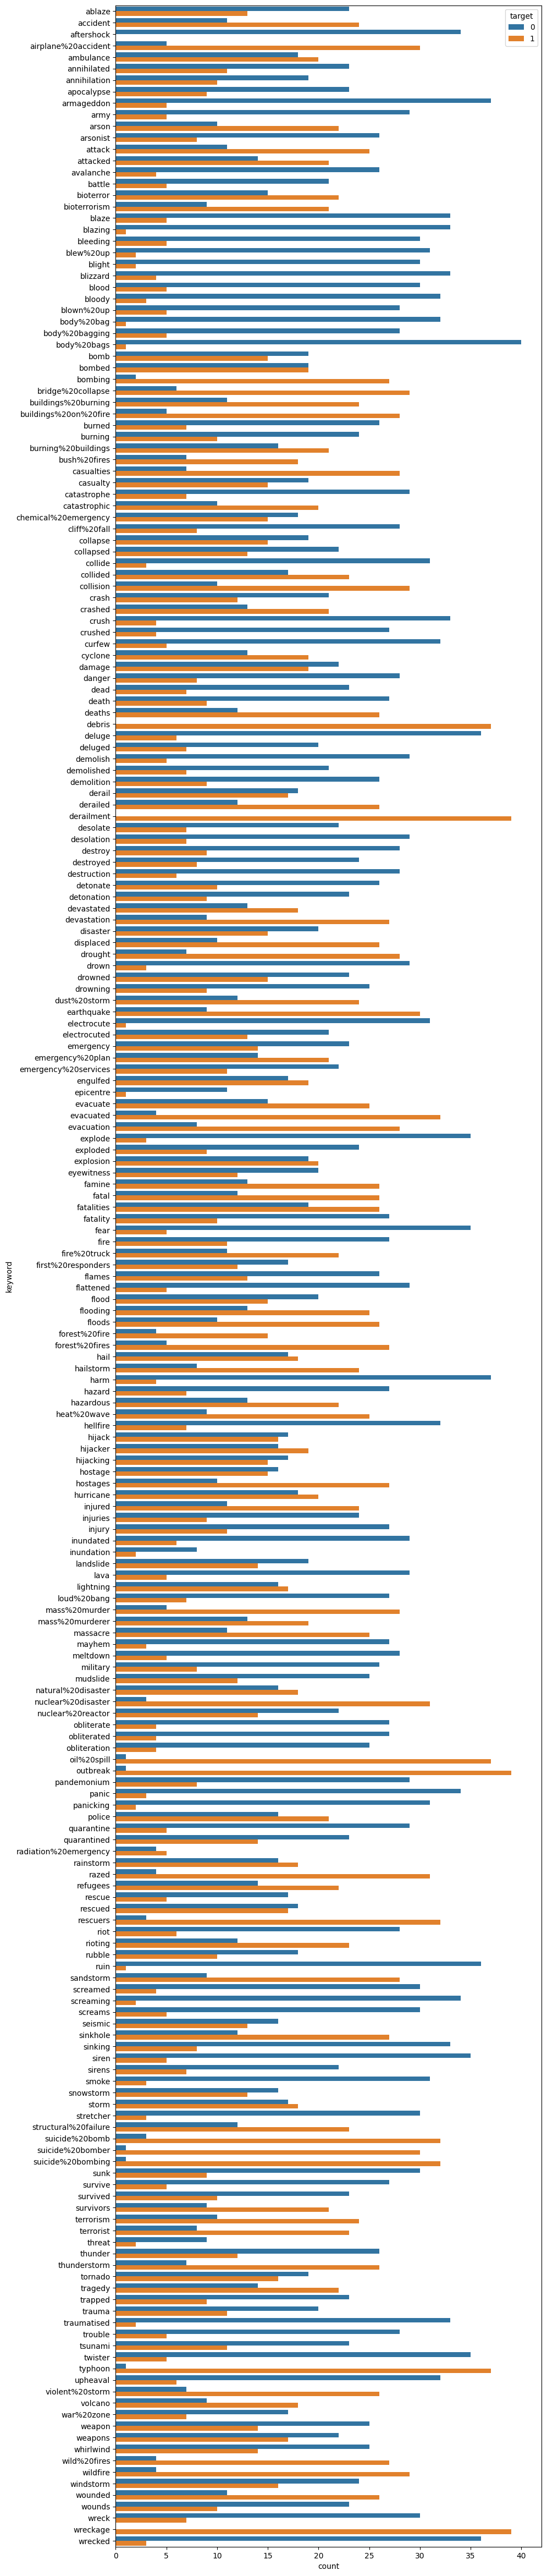

In [405]:
plt.figure(figsize=(10,60))
sns.countplot(data = df_train, y='keyword', hue='target')

In [406]:
nltk.download('all')
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    text = text.lower()

    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs
    #text = re.sub(r"http", "",text)

    html=re.compile(r'<.*?>')

    text = html.sub(r'',text) #Removing html tags

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations

    text = [word.lower() for word in text.split() if word.lower() not in sw]

    text = [lemmatizer.lemmatize(word) for word in text]

    text = " ".join(text) #removing stopwords and lemmatizing

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis

    return text

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [407]:
def preprocess(df):
  df['text'] = df['text'].apply(lambda x: clean_text(x))
  df = df.fillna('NaN', axis=1)
  # df['text'] = 'KEYWORD= ' + df.keyword + '; LOCATION= ' + df.location + '; TEXT= ' + df.text
  # df.drop(["id", "keyword", "location"], inplace=True, axis=1)
  return df

In [408]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

In [409]:
df_train.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [410]:
df_train.shape

(7613, 5)

<Axes: >

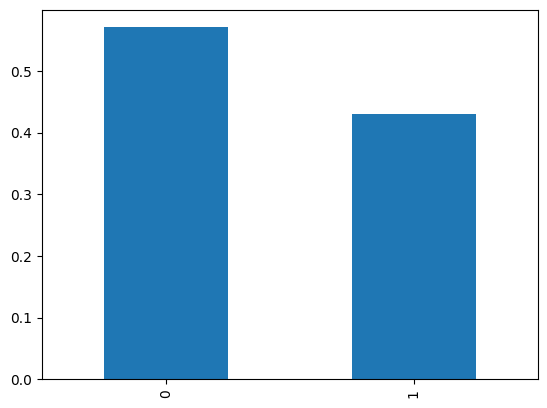

In [411]:
df_train['target'].value_counts(normalize=True).plot.bar()

In [412]:
TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.3

from sklearn.model_selection import train_test_split

X = df_train["text"]
y = df_train["target"]
y=y.astype('int')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

X_test = df_test["text"]

In [413]:
X_train

1186    ash australia collapse trent bridge among wors...
4071    great michigan technique camp b g thanks bmurp...
5461    cnn tennessee movie theater shooting suspect k...
5787                 still rioting couple hour left class
7445    crack path wiped morning beach run surface wou...
                              ...                        
5226    eganator many obliteration server always like ...
5390    panic attack bc enough money drug alcohol want...
860     omron hem c automatic blood pressure monitor s...
7603    official say quarantine place alabama home pos...
7270    moved england five year ago today whirlwind ti...
Name: text, Length: 5329, dtype: object

In [414]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(5329, 16231)

In [415]:
print(f"Vocabulary mapping for disaster text corpus : \n {cv.vocabulary_}")

Vocabulary mapping for disaster text corpus : 
 {'ash': 697, 'australia': 822, 'collapse': 2442, 'trent': 14137, 'bridge': 1590, 'among': 431, 'worst': 15446, 'history': 6034, 'england': 4119, 'bundled': 1716, 'http': 6230, 'tco': 13562, 'trhjuau': 14142, 'great': 5545, 'michigan': 8706, 'technique': 13598, 'camp': 1873, 'thanks': 13706, 'bmurph': 1422, 'hail': 5727, 'youtsey': 15931, 'termn': 13646, 'goblue': 5432, 'wrestleon': 15487, 'oaskgki': 9684, 'qj': 11075, 'cnn': 2387, 'tennessee': 13633, 'movie': 9023, 'theater': 13718, 'shooting': 12506, 'suspect': 13359, 'killed': 7495, 'police': 10606, 'di': 3326, 'elzswnr': 4035, 'still': 13134, 'rioting': 11733, 'couple': 2683, 'hour': 6180, 'left': 7855, 'class': 2319, 'crack': 2718, 'path': 10221, 'wiped': 15321, 'morning': 8978, 'beach': 1093, 'run': 11973, 'surface': 13337, 'wound': 15453, 'elbow': 3984, 'right': 11719, 'knee': 7562, 'yaqrsximph': 15790, 'expert': 4373, 'france': 4956, 'begin': 1137, 'examining': 4324, 'airplane': 27

In [416]:
y_train

1186    0
4071    1
5461    1
5787    1
7445    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 5329, dtype: int64

In [417]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', class_weight='balanced', dual=True)
lr.fit(X_train_cv, y_train)


# transform X_val using CV
X_val_cv = cv.transform(X_val)


# generate predictions
predictions = lr.predict(X_val_cv)
predictions

array([0, 0, 1, ..., 1, 1, 1])

In [418]:
df = pd.DataFrame(confusion_matrix(y_val,predictions), index=[0,1], columns=[0,1])

df

,0,1
0,1119,199
1,257,709


In [419]:
print("Training accuracy: ", lr.score(X_train_cv, y_train))

Training accuracy:  0.9786076186901858


In [420]:
print("Val acc: ", lr.score(X_val_cv, y_val))

Val acc:  0.8003502626970228


In [421]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val, predictions)
print("F1 Score: ", f1)

F1 Score:  0.7566702241195303


In [422]:
# Preparing submission

# transform X_test using CV
X_test_cv = cv.transform(X_test)


# generate predictions
predictions = lr.predict(X_test_cv)
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [423]:
predicted_df = df_test.copy()
predicted_df['target'] = predictions

In [424]:
predicted_df

,id,keyword,location,text,target
0,0,NaN,NaN,happened terrible car crash,1
1,2,NaN,NaN,"heard earthquake different cities, stay safe e...",1
2,3,NaN,NaN,"forest fire spot pond, goose fleeing across st...",1
3,9,NaN,NaN,apocalypse lighting spokane wildfire,1
4,11,NaN,NaN,typhoon soudelor kill china taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles safety fastener ...,1
3259,10865,NaN,NaN,storm ri worse last hurricane city amp others ...,1
3260,10868,NaN,NaN,green line derailment chicago http tco utbxlcbiuy,1
3261,10874,NaN,NaN,meg issue hazardous weather outlook hwo http t...,1


In [425]:
submission_df = pd.read_csv(f'/content/sample_submission.csv')
submission = pd.DataFrame({"id": submission_df['id'],
            "target":predictions})
submission.to_csv('/content/submission.csv', index=False)